# Logistic Regression - Brain Tumor Classification

**Objective**: To classify if the brain tumor is non-cancerous (0) or cancerous (1)

**Outline**: 

1. **Constructing the Model** 

    - 1.1 Logistic Regression Model
    - 1.2 Model Testing 
    
2. **Data Preprocessing**

    - 2.1 Descriptive Statistics
    - 2.2 Data Scaling and Splitting

3. **Model Evaluation**

Dataset from  https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

SEED = 42 # set the random seed to 42 for reproducibility

## 1. Constructing the Model

### 1.1 Logistic Regression Model

**Model Outline**:
  1. **\_\_init\_\_** -> for initializing the hyperparameters
  2. **fit** -> to fit X_train and y_train into the model to train
  3. **predict** -> 1. return the predicted class; 2. to predict X_test (probability)
  4. **_add_bias_term** -> to add the bias term x_0 column vector (full of ones)
  5. **_initialize** -> to initialize and convert the data structure of the X_train and y_train if necessary
  6. **_gradient_descent** -> updating the parameters theta

In [12]:
class GDLogisticRegression:

  # public:
  def __init__(self, alpha_learning_rate, iterations): 


    """
    Two hyperparmemters in gradient descent:
      1. alpha_learning_rate -> control the "step size" for optimization
      2. iterations -> control the "number of steps"

    """
        

    self.alpha_learning_rate = alpha_learning_rate
    self.iterations = iterations

    self.trained = False

  def fit(self, X, y):


    """
    fit/ train the model:
    1. initialize the feature matrix X and target vector y
    2. perform _ times gradient ascent set in "iterations" hyperparameter
    3. return the estimated/ trained parameters theta

    """
        

    self._initialize(X, y)

    for _ in range(self.iterations):
      self._gradient_ascent()

    self.trained = True
    return self.theta
  
  def predict(self, X, prob = False):


    """
    Two scenarios:
      1. X_train is passed -> just return the hypothesis function (h) for y_pred to update theta
      2. X_test is passed -> add bias term to X_test, then return h

    """
        

    if self.trained:
      X = self._add_bias_term(X)
      h = self._sigmoid(np.dot(X, self.theta))

      return h if prob else np.where(h < 0.5, 0, 1)
    
    else:
      h = np.dot(X, self.theta)
      return h

  # private:
  def _sigmoid(self, z):
    return 1 / (1+np.exp(-z))

  def _add_bias_term(self, X):
    x_0_bias_term = np.ones(X.shape[0]).reshape((-1, 1))   
    return np.hstack((X, x_0_bias_term)) 

  def _initialize(self, X, y):
    self.m_samples, self.n_features = X.shape

    self.theta = np.zeros(self.n_features + 1).reshape((self.n_features + 1, 1))
    
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      X = X.to_numpy()
    self.X = self._add_bias_term(X) 

    if isinstance(y, pd.Series):
      y = y.to_numpy()
    self.y = y.reshape((-1, 1))

  def _gradient_ascent(self):
    # gradient of the cost function J
    h = self.predict(self.X)
    d_J_gradient = (np.dot(self.X.T, (self.y - self._sigmoid(h)))) * (1/ self.m_samples)

    # update parameter
    self.theta = self.theta + (self.alpha_learning_rate * d_J_gradient)

### 1.2 Model Testing

In [13]:
# 1. prepare testing dataset
np.random.seed(SEED)

X = np.random.normal(loc=0, scale=1, size=(150, 1))

p = 1/(1+np.exp(-X)) 
y = np.where(p < 0.5, 0, 1) # map to binary

noise = np.random.normal(loc=0, scale=0.3, size=(150, 1)) # add noise
y = np.where(y+noise < 0.5, 0, 1) # map back to binary


# 2. data splitting (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


# 3. training
rate, iters = 0.01, 10000
lr = GDLogisticRegression(alpha_learning_rate=rate, iterations=iters)
lr.fit(X_train, y_train)


# 4. testing
x_proba = np.linspace(-3,3,200).reshape((-1,1))
y_pred_proba = lr.predict(x_proba, prob=True)

y_pred = lr.predict(X_test)

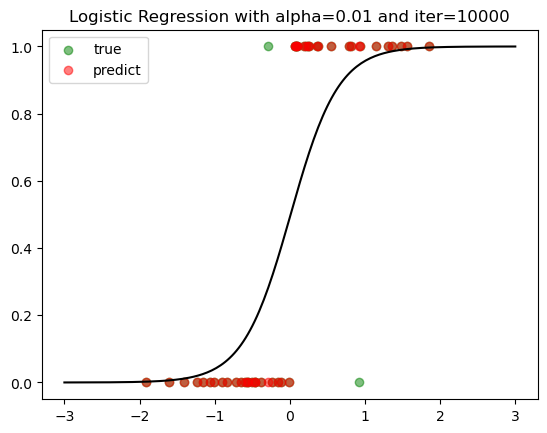

In [14]:
# 5. visualization
plt.title(f"Logistic Regression with alpha={rate} and iter={iters}")

plt.plot(x_proba, y_pred_proba, color='black') # sigmoid curve

plt.scatter(X_test, y_test, color='green', label="true", alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label="predict", alpha=0.5)

plt.legend();

## 2. Data Preprocessing

### 2.1 Descriptive Statistics

In [15]:
df = pd.read_csv("tumor_data.csv")
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [16]:
df.drop(columns=['Image'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3762 non-null   int64  
 1   Mean                3762 non-null   float64
 2   Variance            3762 non-null   float64
 3   Standard Deviation  3762 non-null   float64
 4   Entropy             3762 non-null   float64
 5   Skewness            3762 non-null   float64
 6   Kurtosis            3762 non-null   float64
 7   Contrast            3762 non-null   float64
 8   Energy              3762 non-null   float64
 9   ASM                 3762 non-null   float64
 10  Homogeneity         3762 non-null   float64
 11  Dissimilarity       3762 non-null   float64
 12  Correlation         3762 non-null   float64
 13  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 411.6 KB


In [17]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


While the dataset is a little unbalanced as the mean of the class is 0.447, we can still proceed with the classification process and see how well the model will perform.

### 2.2 Data Scaling and Splitting

In [18]:
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
print(X_train.shape, y_train.shape)

(2633, 13) (2633,)


## 3. Model Evaluation

A simple performance comparison between my model and sklearn's model using the accuracy score.

In [19]:
model = GDLogisticRegression(0.01, 10000) # initialize
model.fit(X_train, y_train) # train
y_pred = model.predict(X_test) # predict

my_model_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score of my model is {my_model_score}")

The accuracy score of my model is 0.9760850310008857


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # initialize
model.fit(X_train, y_train.ravel()) # train
y_pred = model.predict(X_test).reshape((-1,1)) # predict

sklearn_model_score = accuracy_score(y_test, y_pred)
print(f"The accuracy score of sklearn's model is {sklearn_model_score}")

The accuracy score of sklearn's model is 0.983170947741364


The high acacuracy (>97.0%) in both models demonstrates  that even if we do not have any domain knowledge about brain tumor, logistic regression model can still perform well if the dataset is clean.